# imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Load Data

In [2]:
data = pd.read_csv('data\\titanic\\train.csv', index_col='PassengerId')

# Preprocessing

In [3]:
df = data.copy()

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [9]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df.drop(df[df.Embarked.isnull()].index, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


## Categorical Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [14]:
sex_encoder = LabelEncoder()
df.Sex = sex_encoder.fit_transform(df.Sex)

In [15]:
emb_encoder = OneHotEncoder(sparse=False)
df[['C', 'Q', 'S']] = emb_encoder.fit_transform(df[['Embarked']])

In [16]:
df.drop(columns=['Embarked'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
2,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
3,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
4,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
5,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   C         889 non-null    float64
 8   Q         889 non-null    float64
 9   S         889 non-null    float64
dtypes: float64(5), int32(1), int64(4)
memory usage: 72.9 KB


## Treating Missing Values

In [18]:
from sklearn.impute import KNNImputer?

Object `KNNImputer` not found.


In [ ]:
from sklearn.impute import KNNImputer

In [19]:
from sklearn.impute import KNNImputer

In [20]:
imputer = KNNImputer()
imputed = imputer.fit_transform(df)
imputed

array([[0., 3., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 3., 0., ..., 0., 0., 1.],
       ...,
       [0., 3., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 0., 0.],
       [0., 3., 1., ..., 0., 1., 0.]])

In [21]:
imdf = pd.DataFrame(imputed)
imdf.columns = df.columns
imdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0


In [22]:
imdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    float64
 1   Pclass    889 non-null    float64
 2   Sex       889 non-null    float64
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    float64
 5   Parch     889 non-null    float64
 6   Fare      889 non-null    float64
 7   C         889 non-null    float64
 8   Q         889 non-null    float64
 9   S         889 non-null    float64
dtypes: float64(10)
memory usage: 69.6 KB


## Treat Outliers

## Balancing Dataset

In [23]:
dist = df.Survived.value_counts()
dist.values

array([549, 340], dtype=int64)

<IPython.core.display.Javascript object>


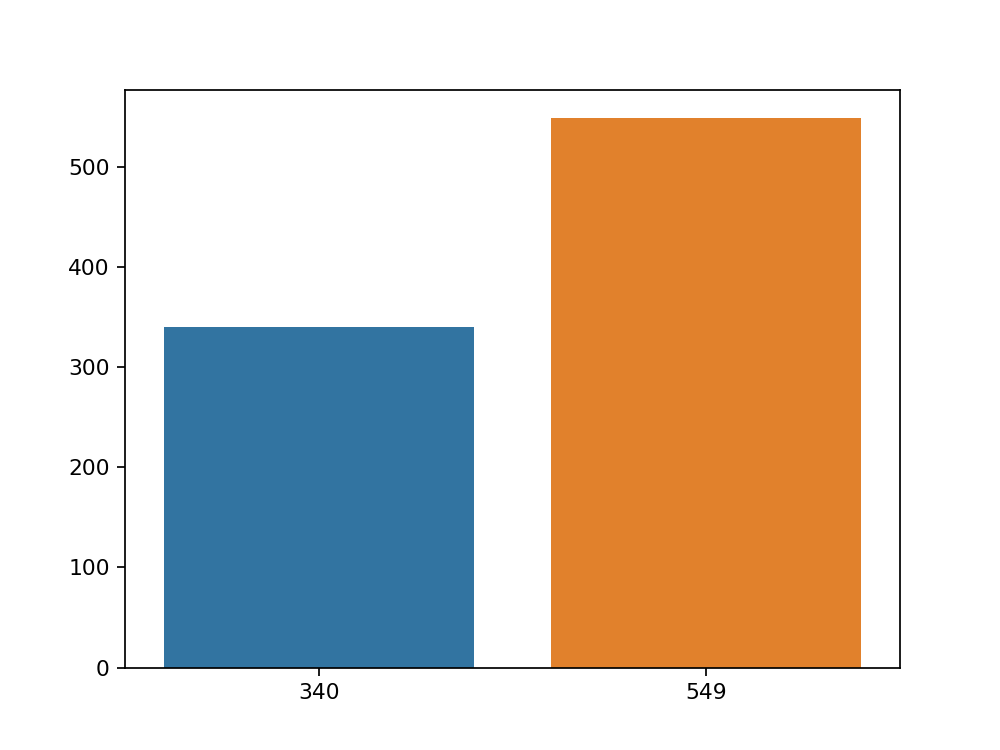

<AxesSubplot:>

In [24]:
sns.barplot(x=dist.values, y=dist.values)

In [25]:
#! pip install imblearn

In [26]:
from imblearn.over_sampling import SMOTE

In [28]:
sampler = SMOTE()

In [76]:
features, target = sampler.fit_resample(imdf.drop(columns=['Survived']), imdf.Survived)

In [77]:
target.value_counts()

0.0    549
1.0    549
Name: Survived, dtype: int64

# Feature Engineering and Selection

### Standarization

In [78]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
columns = features.columns
features = pd.DataFrame(scaler.fit_transform(features))
features.columns = columns

In [82]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.25, random_state=42
)

In [83]:
xtrain.shape

(823, 9)

In [84]:
xtest.shape

(275, 9)

In [85]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

scores = mutual_info_classif(xtrain, ytrain, random_state=42)
scores = pd.DataFrame(scores)
scores.index = xtrain.columns
scores.columns = ['Score',]
scores.sort_values(by='Score', ascending=False)

,Score
Sex,0.217832
Fare,0.153575
Age,0.098387
Parch,0.095559
Pclass,0.088904
SibSp,0.046564
C,0.044670
S,0.032764
Q,0.020370


In [86]:
def scorer(xtrain, ytrain):
    return mutual_info_classif(xtrain, ytrain, random_state=42)

In [87]:
selector = SelectKBest(score_func=scorer, k=2)
selector.fit(xtrain, ytrain)

SelectKBest(k=2, score_func=<function scorer at 0x00000296C4137EB0>)

In [88]:
selected_f = selector.get_feature_names_out()

# Random Forest

In [89]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [90]:
clf1 = RandomForestClassifier(random_state=42)
clf1.fit(xtrain[selected_f], ytrain)

RandomForestClassifier(random_state=42)

In [91]:
ypredtr = clf1.predict(xtrain[selected_f])
ypredts = clf1.predict(xtest[selected_f])

In [92]:
cr1 = classification_report(ypredtr, ytrain)
cr2 = classification_report(ypredts, ytest)

In [93]:
print(cr1)

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       440
         1.0       0.88      0.95      0.92       383

    accuracy                           0.92       823
   macro avg       0.92      0.92      0.92       823
weighted avg       0.92      0.92      0.92       823



In [94]:
print(cr2)

              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82       146
         1.0       0.79      0.84      0.81       129

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275



In [96]:
features[selected_f].describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,1098.0,-6.471245e-17,1.000456,-1.213772,-1.213772,0.863696,0.863696,0.863696
Fare,1098.0,-1.747236e-16,1.000456,-0.665027,-0.510350,-0.360476,-0.006226,9.179179


In [98]:
x1, x2 = np.meshgrid(
    np.arange(-1.213772, 0.863696, 0.01), np.arange(-0.665027, 9.179179, 0.01)
)

features = np.c_[x1.ravel(), x2.ravel()]
preds = clf1.predict(features)
predGrid = preds.reshape(x1.shape)

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
plt.figure()
plt.pcolormesh(x1, x2, predGrid)
plt.scatter(xtrain['Sex'], xtrain['Fare'], c=clf1.predict(xtrain[selected_f]), edgecolor='black')
plt.show()

## Do Cross Validation

# Hyperparameter Tuning